In [1]:
import sys
sys.path.append('../.')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Load data**

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

dataset = 'breast'
X = pd.read_csv('data/breast_cancer.csv')

ind = list(range(len(X.columns)))
ind = [x for x in ind if x != X.columns.get_loc("target")]
col_list = X.columns[ind]
ct = ColumnTransformer([('scaler', StandardScaler(), col_list)], remainder='passthrough')

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0.0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0.0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0.0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0.0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0.0


**Fit model**

In [3]:
from sklearn.model_selection import train_test_split
from GoggleModel import GoggleModel

In [4]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.33, shuffle=True)

gen = GoggleModel(
    ds_name=dataset,
    input_dim=X_train.shape[1],
    encoder_dim=64,
    encoder_l=2,
    het_encoding=True,
    decoder_dim=64,
    decoder_l=2,
    threshold=0.1,
    het_decoder=False,
    graph_prior=None,
    prior_mask=None,
    device='cuda',
    beta=0.1,
    learning_rate=0.01,
    seed=42
)
gen.model

Goggle(
  (learned_graph): LearnedGraph(
    (threshold): Threshold(threshold=0.1, value=0)
  )
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=31, out_features=64, bias=True)
      (1): ReLU()
    )
    (encode_mu): Linear(in_features=64, out_features=31, bias=True)
    (encode_logvar): Linear(in_features=64, out_features=31, bias=True)
  )
  (graph_processor): GraphInputProcessorHomo()
  (decoder): GraphDecoderHomo(
    (decoder): Sequential(
      (0): SAGEConv(
        (feat_drop): Dropout(p=0.0, inplace=False)
        (activation): Tanh()
        (fc_self): Linear(in_features=64, out_features=32, bias=False)
        (fc_neigh): Linear(in_features=64, out_features=32, bias=False)
      )
      (1): SAGEConv(
        (feat_drop): Dropout(p=0.0, inplace=False)
        (fc_self): Linear(in_features=32, out_features=1, bias=False)
        (fc_neigh): Linear(in_features=32, out_features=1, bias=False)
      )
    )
  )
)

In [5]:
gen.fit(X_train)

[Epoch  50/1000, patience  4] train: 4.903, val: 5.266
[Epoch 100/1000, patience 13] train: 4.047, val: 4.756
[Epoch 150/1000, patience  7] train: 3.644, val: 4.378
[Epoch 200/1000, patience 46] train: 3.563, val: 4.130
Training terminated after 203 epochs


**Evaluate synthetic data**

In [6]:
X_synth = gen.sample(X_test)
X_synth.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,-0.785234,-1.623121,-0.836732,-0.809078,-0.903180,-0.997811,-0.007540,-0.386334,-1.872863,-0.193608,...,-1.410182,-0.990373,-1.069929,-1.415426,-1.042046,-0.460450,-0.975027,-1.079750,-0.951372,0.0
1,-0.979114,1.266354,-0.842083,-0.953856,-0.920419,-0.427926,-0.502426,-0.850579,-1.633211,0.204672,...,0.836294,-0.782928,-0.729550,0.102391,0.685375,0.019110,-0.183307,-0.007398,0.208578,0.0
2,-0.586546,-1.440938,-0.666464,-0.616008,-1.640813,-0.939228,-1.053249,-0.777335,-2.017757,-0.803564,...,-1.523489,-0.712734,-0.775814,-1.525956,-0.958084,-1.272145,-0.903674,-1.388973,-0.986316,1.0
3,-0.639458,-1.431838,-0.643823,-0.674177,-0.482946,-0.562730,-0.291471,-0.702238,-0.295851,-0.855232,...,-1.361695,-0.658331,-0.807452,-0.536381,-0.337209,-0.178405,-0.350145,-0.056469,-1.089797,1.0
4,-1.148986,-0.552341,-1.079777,-1.126340,-1.003328,-0.291819,-0.197418,-0.345761,-1.121799,0.031058,...,-0.817671,-1.459071,-1.485451,-0.614105,-0.274950,-0.295407,-0.273815,-0.569152,-0.496601,0.0


In [7]:
res = gen.evaluate_synthetic(X_synth, X_test)
print(f'Quality: {res[0]:.3f}')
print(f'Detection: {res[2]:.3f}')
print(f'Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}')

Evaluating classification performance...
Evaluating classification performance...
Evaluating classification performance...
Quality: 0.537
Detection: 0.780
Performance on real: 0.994, on synth: 0.944


**Generate TSNE plots**

In [8]:
X_test['label'] = 'Original'
X_synth['label'] = 'Synthetic'

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df['label']
x_data = concat_df.drop(['label', 'target'], axis=1)

In [9]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

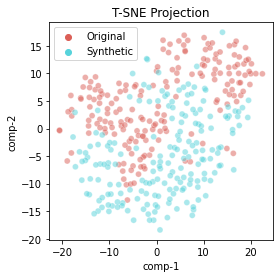

In [10]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2), alpha=0.5,
                data=df).set(title=f"T-SNE Projection")
plt.xlabel('comp-1')
plt.ylabel('comp-2')
plt.legend()

plt.show()

**Visualise adjacency matrix**

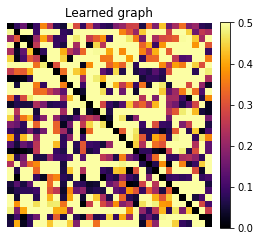

In [11]:
adj_matrix = gen.model.learned_graph(None).cpu().detach().numpy()
adj_matrix = np.abs(adj_matrix)
plt.figure(figsize=(4, 4))
im = plt.imshow(adj_matrix, cmap='inferno', interpolation='nearest', vmin=0, vmax=0.5)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title('Learned graph')
plt.axis('off')
plt.show()